In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states
from VN import compute_VN_time


In [2]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb)
time_indices = [0, 10, 20, 30, 49]  # Specify the time indices of interest

In [3]:
time_index = 0  # Define the time index
s0 = compute_schmidt_states(result, time_index, 1)[0]

C:\Users\marin\Dev\Quantum_Branching\VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
C:\Users\marin\Dev\Quantum_Branching\VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
C:\Users\marin\energy-branching\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\marin\energy-branching\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


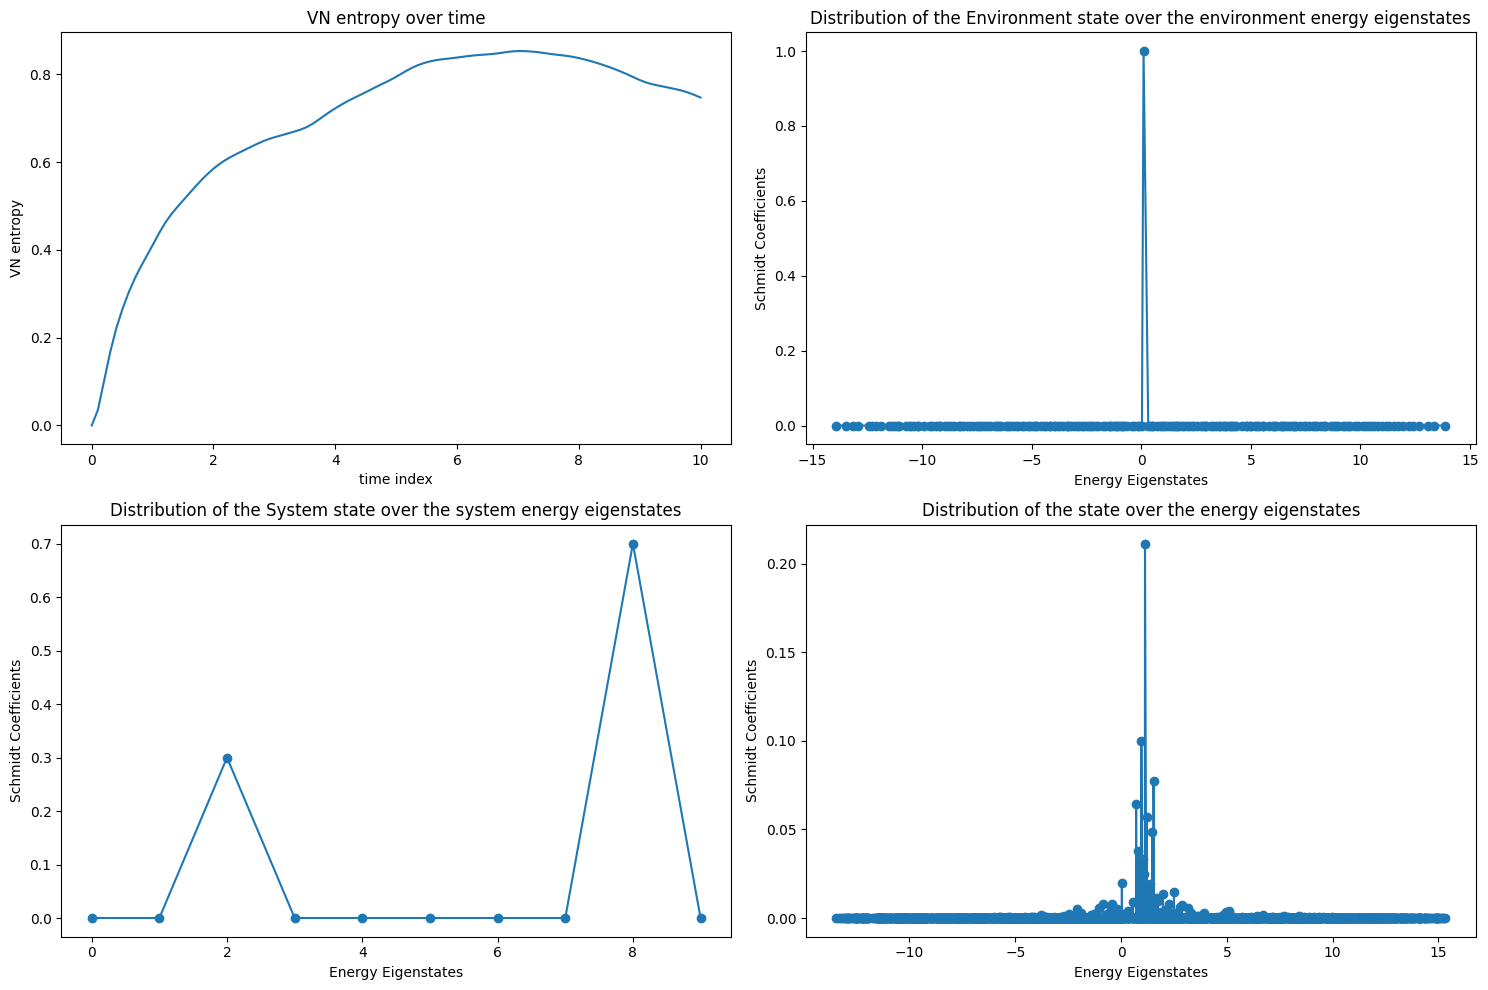

In [4]:
######This is a checkup to see if you program works


# Eigenstates and eigenenergies 
eigenenergies_system_2, eigenstates_system_2 = H_system_2.eigenstates() 
eigenenergies_system_total, eigenstates_system_total = H_total.eigenstates() 
eigenenergies_system_1, eigenstates_system_1 = H_q.eigenstates() 
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
v2 = compute_VN_time(result,tlist)

# Plot 1: VN entropy over time
axes[0, 0].plot(tlist, v2)
axes[0, 0].set_title("VN entropy over time")
axes[0, 0].set_xlabel("time index")
axes[0, 0].set_ylabel("VN entropy")

# Plot 2: Distribution of the Environment state over the environment energy eigenstates
time_index = 0  # Define the time index
s0 = compute_schmidt_states(result, time_index, 1)[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_2]
axes[0, 1].plot(eigenenergies_system_2, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_2}')
axes[0, 1].set_title("Distribution of the Environment state over the environment energy eigenstates")
axes[0, 1].set_xlabel("Energy Eigenstates")
axes[0, 1].set_ylabel("Schmidt Coefficients")



# Plot 3: Distribution of the System state over the system energy eigenstates
s0 = compute_schmidt_states(result, time_index, 0)[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_1]
axes[1, 0].plot(eigenenergies_system_1, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_1}')
axes[1, 0].set_title("Distribution of the System state over the system energy eigenstates")
axes[1, 0].set_xlabel("Energy Eigenstates")
axes[1, 0].set_ylabel("Schmidt Coefficients")

# Plot 4: Distribution of the state over the energy eigenstates
s0 = result.states[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_total]
axes[1, 1].plot(eigenenergies_system_total, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_total}')
axes[1, 1].set_title("Distribution of the state over the energy eigenstates")
axes[1, 1].set_xlabel("Energy Eigenstates")
axes[1, 1].set_ylabel("Schmidt Coefficients")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [5]:
def Neff(H_total,result):
    eigenenergies_total, eigenstates_total = H_total.eigenstates() 
    state = result.states[0]
    p2=[(abs(np.vdot(state, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
    Neff = 1/np.sum(p2)
    return Neff

In [6]:
def plot_e_spectrum(H_total, result):
    eigenenergies_total, eigenstates_total = H_total.eigenstates() 
    state = result.states[0]
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    c = np.count_nonzero(energy_coeff)
    print(Neff(H_total,result))
    num_bins=100
    min_energy=min(eigenenergies_total)
    max_energy=max(eigenenergies_total)
    plt.figure(figsize=(10, 2))
    plt.plot(eigenenergies_total,energy_coeff);
    #looks like a nice wigner semicircle, this is the thing, who's shape changes as the interaction energy increases. lets check that
    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_total, bins=num_bins, range=(min_energy, max_energy), edgecolor='black');
    #PERFECT wigner semi cirlce, vs weird cowboy hat

In [7]:
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0, tmax, ind_nb)

In [8]:
result1, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total1, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.01, tmax, ind_nb)

In [9]:
result2, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total2, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.05, tmax, ind_nb)

In [10]:
result3, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total3, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.1, tmax, ind_nb)

In [11]:
result4, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total4, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.15, tmax, ind_nb)

In [12]:
result5, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total5, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 0.25, tmax, ind_nb)

In [13]:
result6, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total6, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, 1, tmax, ind_nb)

1.7241379310344822


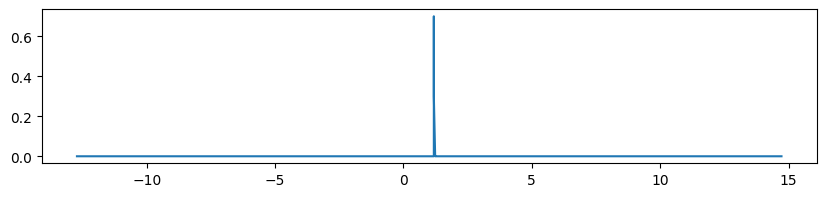

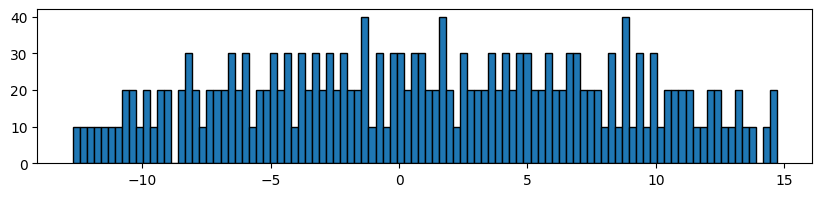

In [14]:
plot_e_spectrum(H_total,result)

3.2546118284121155


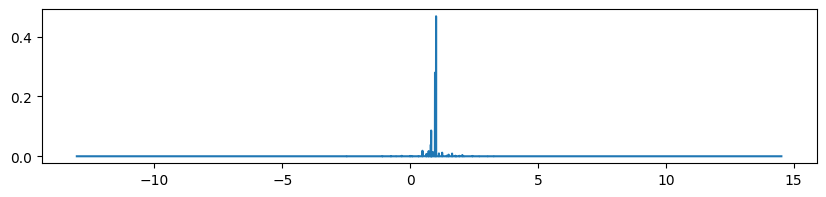

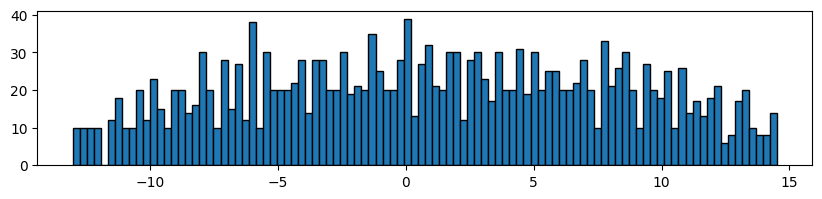

In [15]:
plot_e_spectrum(H_total1,result1)

22.920893583179648


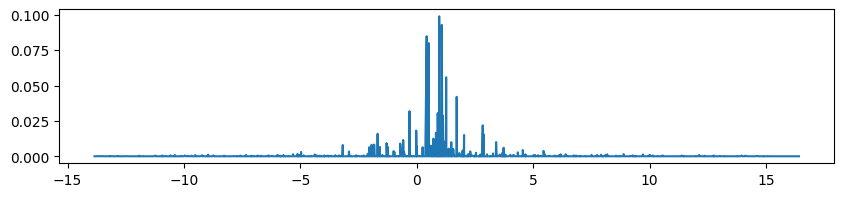

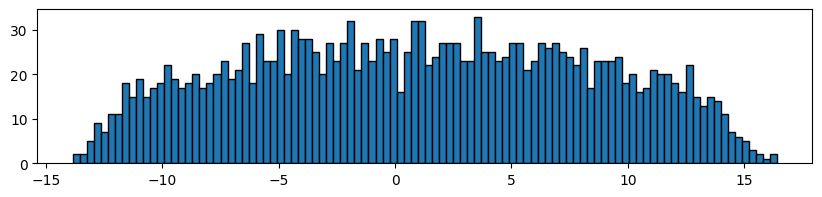

In [16]:
plot_e_spectrum(H_total2,result2)

49.436593215319895


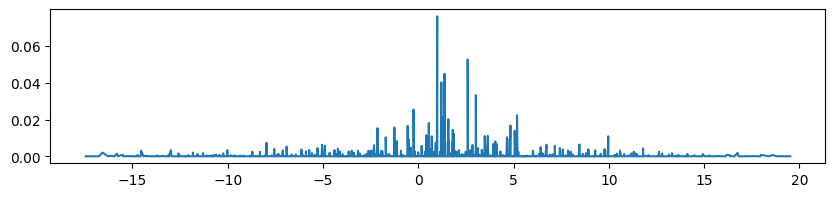

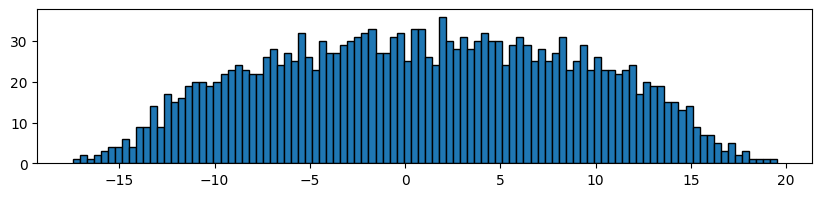

In [17]:
plot_e_spectrum(H_total3,result3)

84.87287079381548


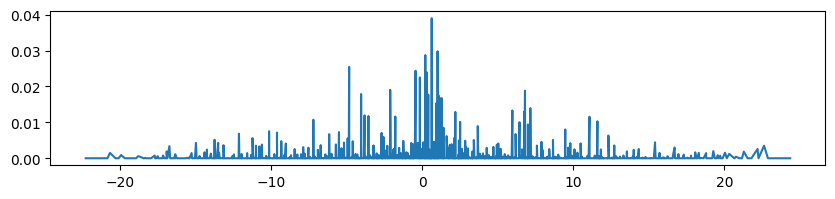

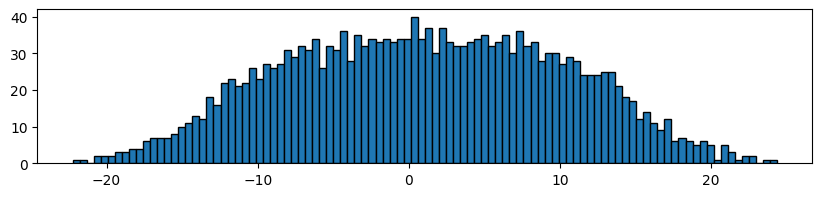

In [18]:
plot_e_spectrum(H_total4,result4)

126.44435674414028


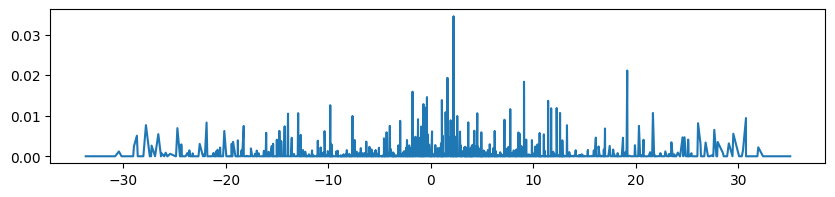

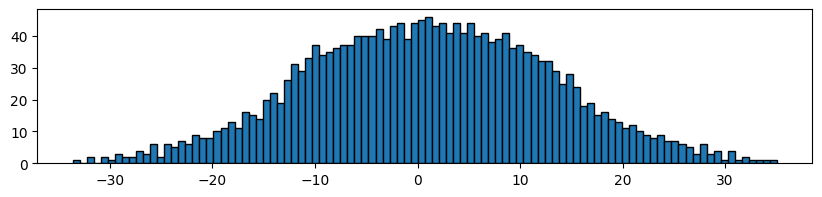

In [19]:
plot_e_spectrum(H_total5,result5)

157.42561987238173


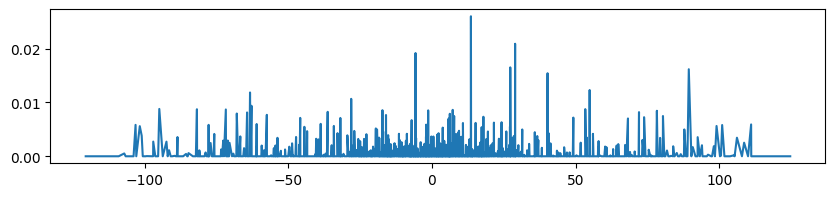

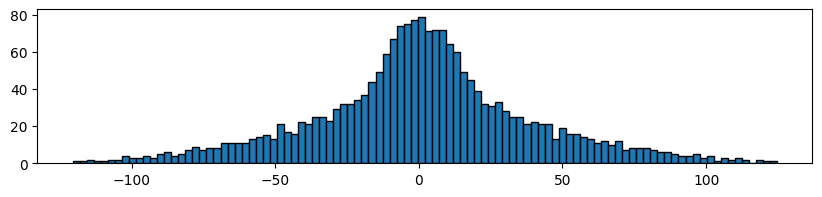

In [20]:
plot_e_spectrum(H_total6,result6)

In [21]:
#computign the neffschmidt/neffttot

def plot_Neff_schmidt(H_total, result):
    eigenenergies_total, eigenstates_total = H_total.eigenstates()
    coef1 = []
    coef2 = []
    coef3 = []

    for idx in range(len(tlist)):
        a = compute_schmidt_states(result, idx, 0, 0)[0] #schmidt 1 on system 1
        b = compute_schmidt_states(result, idx, 1, 0)[0] #schmidt 2 on system 1
        c = compute_schmidt_states(result, idx, 0, 0)[1] #schmidt 1 on system 1
        d = compute_schmidt_states(result, idx, 1, 0)[1] #schmidt 2 on system 1
        e = compute_schmidt_states(result, idx, 0, 0)[2] #schmidt 1 on system 1
        f = compute_schmidt_states(result, idx, 1, 0)[2] #schmidt 2 on system 1
        g = np.tensordot(a, b, 0)
        h = np.tensordot(c, d, 0)
        i = np.tensordot(e, f, 0)
        p2=[(abs(np.vdot(g, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
        p2_=[(abs(np.vdot(h, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
        p2__=[(abs(np.vdot(i, eigenstate)) ** 2) ** 2 for eigenstate in eigenstates_total]
        coef1.append(1/np.sum(p2))
        coef2.append(1/np.sum(p2_))
        coef3.append(1/np.sum(p2__))
    
    plt.figure(figsize=(10, 2))
    plt.xscale("log")
    plt.plot(coef1)
    plt.plot(coef2)
    plt.plot(coef3)

C:\Users\marin\AppData\Local\Temp\ipykernel_4960\4108819230.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  coef2.append(1/np.sum(p2_))
C:\Users\marin\AppData\Local\Temp\ipykernel_4960\4108819230.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


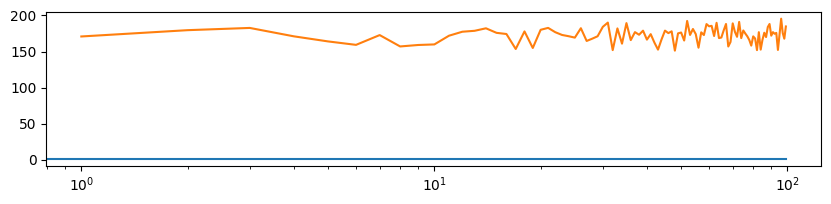

In [22]:
plot_Neff_schmidt(H_total,result)

C:\Users\marin\AppData\Local\Temp\ipykernel_4960\4108819230.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


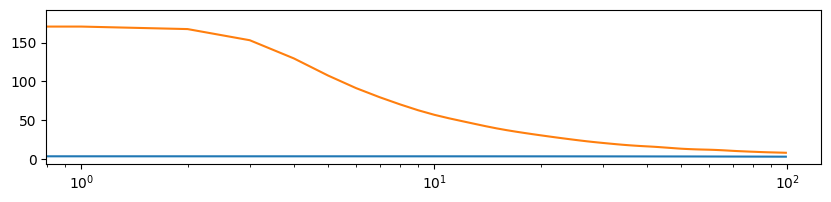

In [23]:
plot_Neff_schmidt(H_total1,result1)

C:\Users\marin\AppData\Local\Temp\ipykernel_4960\4108819230.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


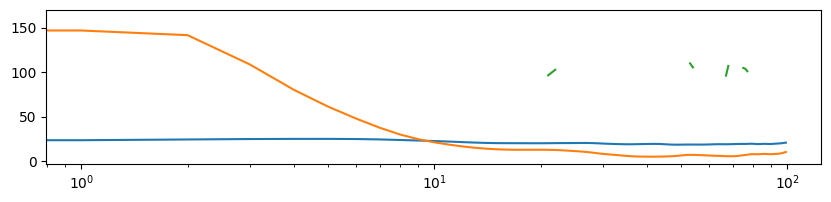

In [24]:
plot_Neff_schmidt(H_total2,result2)

C:\Users\marin\AppData\Local\Temp\ipykernel_4960\4108819230.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


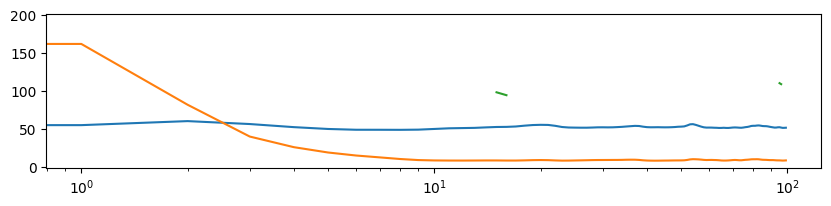

In [25]:
plot_Neff_schmidt(H_total3,result3)

C:\Users\marin\AppData\Local\Temp\ipykernel_4960\4108819230.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


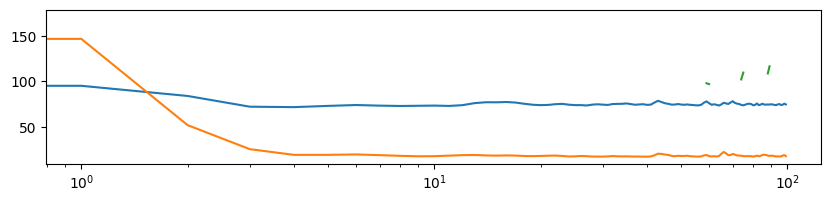

In [26]:
plot_Neff_schmidt(H_total4,result4)

C:\Users\marin\AppData\Local\Temp\ipykernel_4960\4108819230.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


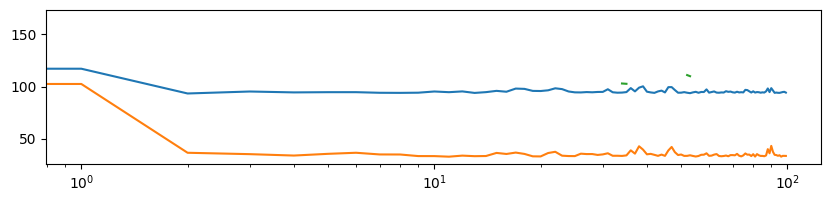

In [27]:
plot_Neff_schmidt(H_total5,result5)

C:\Users\marin\AppData\Local\Temp\ipykernel_4960\4108819230.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))


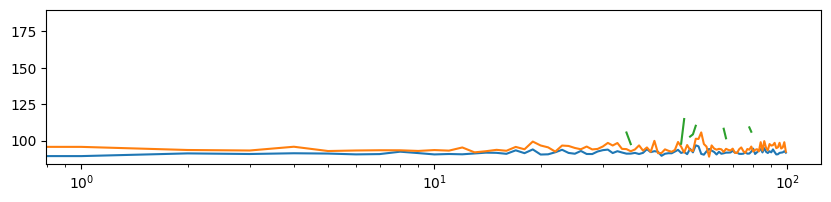

In [28]:
plot_Neff_schmidt(H_total6,result6)